In [2]:
#Question 1

import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
(x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()
print('x_train: ', x_train.shape)
K = len(np.unique(y_train)) # Classes
print(K)
Ntr = x_train.shape[0]

Nte = x_test.shape[0]
Din = 3072 # CIFAR10
# Din = 784 # MINIST
# Normalize pixel values
x_train, x_test = x_train / 255.0, x_test / 255.0
mean_image = np.mean(x_train, axis=0)
x_train = x_train - mean_image
x_test = x_test - mean_image
y_train = tf.keras.utils.to_categorical(y_train, num_classes=K)
y_test = tf.keras.utils.to_categorical(y_test, num_classes=K)
x_train = np.reshape(x_train,(Ntr,Din))
x_test = np.reshape(x_test,(Nte,Din))
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
std=1e-5
w1 = std*np.random.randn(Din, K)
b1 = np.zeros(K)
print("w1:", w1.shape)
print("b1:", b1.shape)
batch_size = Ntr
iterations = 300
lr = 1.4e-2
lr_decay= 0.999
reg = 5e-6
loss_history = []
train_acc_history = []
val_acc_history = []
lr_history= []
seed = 0
rng = np.random.default_rng(seed=seed)


def Acc(train,pred):
    l=0
    for i in range(len(train)):
        trainMax = max(list(train[i]))
        trainMaxIndex = list(train[i]).index(trainMax)
        PredMax = max(list(pred[i]))
        PredMaxIndex = list(pred[i]).index(PredMax)
        if trainMaxIndex == PredMaxIndex:
            l+=1
    return(l/len(train))


for t in range(iterations):
    # Forward pass
    y_pred = x_train.dot(w1)+b1
    loss=np.sum((y_pred-y_train)**2)/Ntr + reg*np.sum(w1**2)
    loss_history.append(loss)
    # Backward pass
    dw1 = 2*(1/Ntr)*(x_train.T.dot(y_pred - y_train))  + 2*reg*w1 
    w1 = w1 - lr*dw1
    I=np.ones((Ntr,1))
    db1=2*(1/Ntr)*(I.T.dot(y_pred - y_train))
    b1=b1-lr*db1
    
    train_acc = Acc(y_train,y_pred)
    train_acc_history.append(train_acc)
    valid_acc = Acc( y_test, np.dot(x_test,w1)+b1)
    val_acc_history.append(valid_acc)
    if (t%30==0) or (t==1) or t==iterations-1:
        print("Epoch {:03}- Loss {:.4f}- Training Accuracy: {:.3f}- Validation Accuracy: {:.2f}- Learning Rate: {:.5f}"
              .format(t,loss,train_acc,valid_acc,lr))
    lr_history.append(lr)
    lr=lr*lr_decay

# Printing accuracies and displaying w as images




x_train:  (50000, 32, 32, 3)
10
w1: (3072, 10)
b1: (10,)
Epoch 000 - Loss 1.0000 - Training Accuracy: 0.094 - Validation Accuracy: 0.25 - Learning Rate: 0.01400
Epoch 001 - Loss 0.9579 - Training Accuracy: 0.244 - Validation Accuracy: 0.30 - Learning Rate: 0.01399
Epoch 030 - Loss 0.8236 - Training Accuracy: 0.382 - Validation Accuracy: 0.38 - Learning Rate: 0.01359
Epoch 060 - Loss 0.8009 - Training Accuracy: 0.396 - Validation Accuracy: 0.39 - Learning Rate: 0.01318
Epoch 090 - Loss 0.7939 - Training Accuracy: 0.403 - Validation Accuracy: 0.40 - Learning Rate: 0.01279
Epoch 120 - Loss 0.7906 - Training Accuracy: 0.408 - Validation Accuracy: 0.40 - Learning Rate: 0.01242
Epoch 150 - Loss 0.7884 - Training Accuracy: 0.411 - Validation Accuracy: 0.40 - Learning Rate: 0.01205
Epoch 180 - Loss 0.7868 - Training Accuracy: 0.414 - Validation Accuracy: 0.40 - Learning Rate: 0.01169
Epoch 210 - Loss 0.7856 - Training Accuracy: 0.415 - Validation Accuracy: 0.40 - Learning Rate: 0.01135
Epoch 2

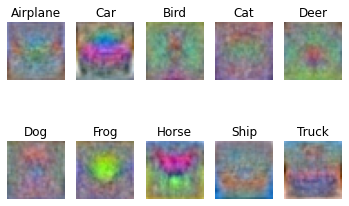

In [12]:
classes =['Airplane','Car','Bird','Cat','Deer','Dog','Frog','Horse','Ship','Truck' ]

plt.subplots(2,5)
w1_norm= 255.0*(w1-np.min(w1))/(np.max(w1)-np.min(w1))
for i in range(10):
    img = w1_norm[:,i].reshape(32,32,3)
    plt.subplot(2,5,i+1)
    plt.imshow(img.astype('uint8'))
    plt.axis('off')
    plt.title(classes[i])

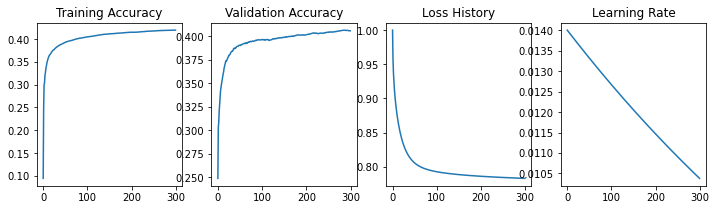

In [26]:
fig, ax = plt.subplots(1,4,figsize=(12,3))
ax[0].plot(train_acc_history)
ax[0].set_title('Training Accuracy')
ax[1].plot(val_acc_history)
ax[1].set_title('Validation Accuracy')
ax[2].plot(loss_history)
ax[2].set_title('Loss History')
ax[3].plot(lr_history)
ax[3].set_title('Learning Rate')

plt.show()

In [2]:
#Question 2

def sgn(x):
    return 1/(1+np.exp(-x))

def Acc(train,pred):
    l=0
    for i in range(len(train)):
        trainMax = max(list(train[i]))
        trainMaxIndex = list(train[i]).index(trainMax)
        PredMax = max(list(pred[i]))
        PredMaxIndex = list(pred[i]).index(PredMax)
        if trainMaxIndex == PredMaxIndex:
            l+=1
    return(l/len(train))

import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
(x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()
print('x_train: ', x_train.shape)
K = len(np.unique(y_train)) # Classes
print(K)
Ntr = x_train.shape[0]
Nte = x_test.shape[0]
Din = 3072 # CIFAR10
# Din = 784 # MINIST
# Normalize pixel values
#x_train, x_test = x_train / 255.0, x_test / 255.0
mean_image = np.mean(x_train, axis=0)
x_train = x_train - mean_image
x_test = x_test - mean_image
y_train = tf.keras.utils.to_categorical(y_train, num_classes=K)
y_test = tf.keras.utils.to_categorical(y_test, num_classes=K)
x_train = np.reshape(x_train,(Ntr,Din))
x_test = np.reshape(x_test,(Nte,Din))
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
std=1e-5

h=200
w1= std*np.random.randn(Din,h)
b1= np.zeros(h)
w2= std*np.random.rand(h,K)
b2= np.zeros(K)
batch_size = Ntr
iterations = 300
lr = 1.4e-2
lr_decay= 0.999
reg = 5e-6
lr_history=[]
loss_history = []
train_acc_history = []
val_acc_history = []
seed = 0
rng = np.random.default_rng(seed=seed)

for t in range(iterations):
    x_=x_train
    y_predMid = sgn(x_.dot(w1)+b1)
    y_pred = y_predMid.dot(w2)+b2
    loss = np.sum((y_pred-y_train)**2)*(1./Ntr) + reg*(np.sum(w2**2)) + reg*(np.sum(w1**2))
    loss_history.append(loss)
    
    train_acc = Acc(y_train, y_pred)
    train_acc_history.append(train_acc)
    y_predMid_test = sgn(x_test.dot(w1)+b1)
    y_pred_test= y_predMid_test.dot(w2)+b2
    val_acc = Acc(y_test, y_pred_test)
    val_acc_history.append(val_acc)
        
    dy_pred = (y_pred-y_train)*2*(1/Ntr)
    dw2 = y_predMid.T.dot(dy_pred) + reg*w2
    db2 = dy_pred.sum(axis=0)
    dy_predMid = dy_pred.dot(w2.T)
    dw1 = x_.T.dot(dy_predMid*y_predMid*(1-y_predMid)) + reg*w1
    db1 = (dy_predMid*y_predMid*(1-y_predMid)).sum(axis=0)
    w1 -= lr*dw1
    w2 -= lr*dw2
    b1 -= lr*db1
    b2 -= lr*db2

    if t%30==0 or t==1 or t== iterations-1:
        print("Epoch {:03}- Loss {:.4f}- Training Accuracy: {:.3f}- Validation Accuracy: {:.2f}- Learning Rate: {:.5f}"
              .format(t,loss,train_acc,val_acc,lr))
    
    lr_history.append(lr)
    lr*= lr_decay

x_train:  (50000, 32, 32, 3)
10
Epoch 000 - Loss 0.9990 - Training Accuracy: 0.100 - Validation Accuracy: 0.10 - Learning Rate: 0.01400
Epoch 001 - Loss 0.9181 - Training Accuracy: 0.100 - Validation Accuracy: 0.10 - Learning Rate: 0.01399
Epoch 030 - Loss 0.8285 - Training Accuracy: 0.316 - Validation Accuracy: 0.31 - Learning Rate: 0.01359
Epoch 060 - Loss 0.8117 - Training Accuracy: 0.349 - Validation Accuracy: 0.35 - Learning Rate: 0.01318
Epoch 090 - Loss 0.7898 - Training Accuracy: 0.387 - Validation Accuracy: 0.38 - Learning Rate: 0.01279
Epoch 120 - Loss 0.7755 - Training Accuracy: 0.406 - Validation Accuracy: 0.39 - Learning Rate: 0.01242
Epoch 150 - Loss 0.7662 - Training Accuracy: 0.420 - Validation Accuracy: 0.40 - Learning Rate: 0.01205
Epoch 180 - Loss 0.7571 - Training Accuracy: 0.437 - Validation Accuracy: 0.42 - Learning Rate: 0.01169
Epoch 210 - Loss 0.7450 - Training Accuracy: 0.455 - Validation Accuracy: 0.44 - Learning Rate: 0.01135
Epoch 240 - Loss 0.7444 - Traini

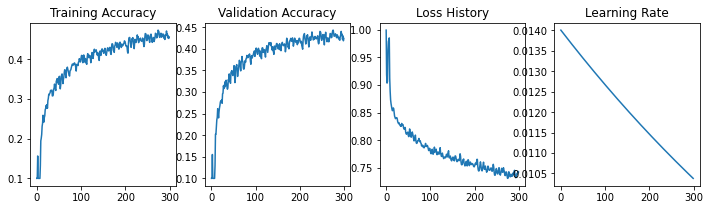

In [3]:
fig, ax = plt.subplots(1,4,figsize=(12,3))
ax[0].plot(train_acc_history)
ax[0].set_title('Training Accuracy')
ax[1].plot(val_acc_history)
ax[1].set_title('Validation Accuracy')
ax[2].plot(loss_history)
ax[2].set_title('Loss History')
ax[3].plot(lr_history)
ax[3].set_title('Learning Rate')

plt.show()

In [17]:
#Question 3

def sgn(x):
    return 1/(1+np.exp(-x))

def Acc(train,pred):
    l=0
    for i in range(len(train)):
        trainMax = max(list(train[i]))
        trainMaxIndex = list(train[i]).index(trainMax)
        PredMax = max(list(pred[i]))
        PredMaxIndex = list(pred[i]).index(PredMax)
        if trainMaxIndex == PredMaxIndex:
            l+=1
    return(l/len(train))

import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
(x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()
print('x_train: ', x_train.shape)
K = len(np.unique(y_train)) # Classes
print(K)
Ntr = x_train.shape[0]
Nte = x_test.shape[0]
Din = 3072 # CIFAR10
# Din = 784 # MINIST
# Normalize pixel values
#x_train, x_test = x_train / 255.0, x_test / 255.0
mean_image = np.mean(x_train, axis=0)
x_train = x_train - mean_image
x_test = x_test - mean_image
y_train = tf.keras.utils.to_categorical(y_train, num_classes=K)
y_test = tf.keras.utils.to_categorical(y_test, num_classes=K)
x_train = np.reshape(x_train,(Ntr,Din))
x_test = np.reshape(x_test,(Nte,Din))
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
std=1e-5

h=200
w1= std*np.random.randn(Din,h)
b1= np.zeros(h)
w2= std*np.random.rand(h,K)
b2= np.zeros(K)
batch_size = 500
iterations = 300
lr = 1.4e-2
lr_decay= 0.999
reg = 5e-6
lr_history = []
loss_history = []
train_acc_history = []
val_acc_history = []
seed = 0
rng = np.random.default_rng(seed=seed)

for t in range(iterations):
    for i in range(round(Ntr/batch_size)):
        indices= np.arange(i*batch_size, (i+1)*batch_size)
        rng.shuffle(indices)
        x= x_train[indices]
        y= y_train[indices]
        y_predMid = sgn(x.dot(w1)+b1)
        y_pred = y_predMid.dot(w2)+b2
        loss = np.sum((y_pred-y)**2)*(1/batch_size) + reg*(np.sum(w2**2)) + reg*(np.sum(w1**2))
        loss_history.append(loss)

        dy_pred = (y_pred-y)*2*(1/batch_size)
        dw2 = y_predMid.T.dot(dy_pred) + reg*w2
        db2 = dy_pred.sum(axis=0)
        dy_predMid = dy_pred.dot(w2.T)
        dw1 = x.T.dot(dy_predMid*y_predMid*(1-y_predMid)) + reg*w1
        db1 = (dy_predMid*y_predMid*(1-y_predMid)).sum(axis=0)
        w1 -= lr*dw1
        w2 -= lr*dw2
        b1 -= lr*db1
        b2 -= lr*db2
        lr*= lr_decay
    
    train_acc = Acc(y, y_pred)
    train_acc_history.append(train_acc)
    y_predMid_test= sgn(x_test.dot(w1)+b1)
    y_pred_test= y_predMid_test.dot(w2)+b2
    val_acc = Acc(y_test, y_pred_test)
    val_acc_history.append(val_acc)
    
    if t%30==0 or t==0 or t==iterations-1:
        print("Epoch {:03} - Loss {:.4f} - Training Accuracy: {:.3f} - Validation Accuracy: {:.2f}"
              .format(t,loss,train_acc,val_acc))

x_train:  (50000, 32, 32, 3)
10
Epoch 000 - Loss 0.7922 - Training Accuracy: 0.398 - Validation Accuracy: 0.38
Epoch 030 - Loss 0.6140 - Training Accuracy: 0.608 - Validation Accuracy: 0.46
Epoch 060 - Loss 0.6031 - Training Accuracy: 0.610 - Validation Accuracy: 0.46
Epoch 090 - Loss 0.6021 - Training Accuracy: 0.612 - Validation Accuracy: 0.46
Epoch 120 - Loss 0.6021 - Training Accuracy: 0.612 - Validation Accuracy: 0.46
Epoch 150 - Loss 0.6021 - Training Accuracy: 0.612 - Validation Accuracy: 0.46
Epoch 180 - Loss 0.6021 - Training Accuracy: 0.612 - Validation Accuracy: 0.46
Epoch 210 - Loss 0.6021 - Training Accuracy: 0.612 - Validation Accuracy: 0.46
Epoch 240 - Loss 0.6021 - Training Accuracy: 0.612 - Validation Accuracy: 0.46
Epoch 270 - Loss 0.6021 - Training Accuracy: 0.612 - Validation Accuracy: 0.46
Epoch 299 - Loss 0.6021 - Training Accuracy: 0.612 - Validation Accuracy: 0.46


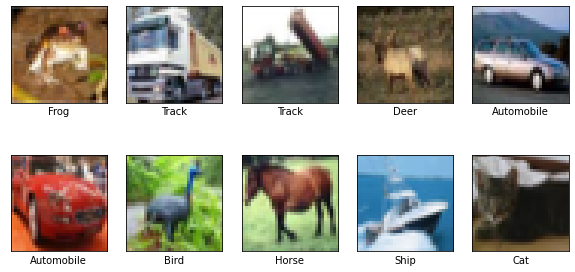

In [13]:
#Question 4

(x_train, y_train),(x_test, y_test) = keras.datasets.cifar10.load_data()

classes = ['Airplane','Automobile','Bird','Cat','Deer','Dog','Frog','Horse','Ship','Track']

plt.figure(figsize = (10,5))
for i in range(10):
    plt.subplot(2,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[i], cmap = plt.cm.binary)
    plt.xlabel(classes[y_train[i][0]])
plt.show()

x_train = x_train.reshape((50000, 32, 32, 3))
x_test = x_test.reshape((10000, 32, 32, 3))
x_train = x_train / 255.
x_test = x_test / 255.

model = keras.models.Sequential()
model.add(keras.layers.Conv2D(filters = 32, kernel_size = (3, 3), strides=1, padding='same',
                              activation='relu', input_shape=(32, 32, 3)))
model.add(keras.layers.MaxPooling2D((2, 2)))
model.add(keras.layers.Conv2D(filters = 64, kernel_size = (3, 3), strides=1, padding='same',
                              activation='relu', input_shape=(32, 32, 3)))
model.add(keras.layers.MaxPooling2D((2, 2)))
model.add(keras.layers.Conv2D(filters = 64, kernel_size = (3, 3), strides=1, padding='same',
                              activation='relu', input_shape=(32, 32, 3)))
model.add(keras.layers.MaxPooling2D((2, 2)))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(64, activation="relu"))
model.add(keras.layers.Dense(10, activation="softmax"))

In [14]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 16, 16, 64)        18496     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 8, 8, 64)          0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 8, 8, 64)          36928     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 4, 4, 64)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 1024)             

In [15]:
sgd = tf.keras.optimizers.SGD(learning_rate=0.01, momentum = 0.09)
model.compile(loss="sparse_categorical_crossentropy",optimizer= sgd,metrics=["accuracy"])

model_history = model.fit(x_train, y_train, epochs=30,batch_size= 50,validation_data=(x_test, y_test))

Epoch 1/30
1000/1000 [==============================] - 79s 74ms/step - loss: 2.2106 - accuracy: 0.1771 - val_loss: 1.8858 - val_accuracy: 0.3335
Epoch 2/30
1000/1000 [==============================] - 72s 72ms/step - loss: 1.8110 - accuracy: 0.3569 - val_loss: 1.5986 - val_accuracy: 0.4220
Epoch 3/30
1000/1000 [==============================] - 66s 66ms/step - loss: 1.5838 - accuracy: 0.4304 - val_loss: 1.4472 - val_accuracy: 0.4745
Epoch 4/30
1000/1000 [==============================] - 66s 66ms/step - loss: 1.4579 - accuracy: 0.4762 - val_loss: 1.3764 - val_accuracy: 0.5060
Epoch 5/30
1000/1000 [==============================] - 66s 66ms/step - loss: 1.3632 - accuracy: 0.5138 - val_loss: 1.2768 - val_accuracy: 0.5490
Epoch 6/30
1000/1000 [==============================] - 66s 66ms/step - loss: 1.2906 - accuracy: 0.5418 - val_loss: 1.2414 - val_accuracy: 0.5577
Epoch 7/30
1000/1000 [==============================] - 66s 66ms/step - loss: 1.2132 - accuracy: 0.5724 - val_loss: 1.1735 -

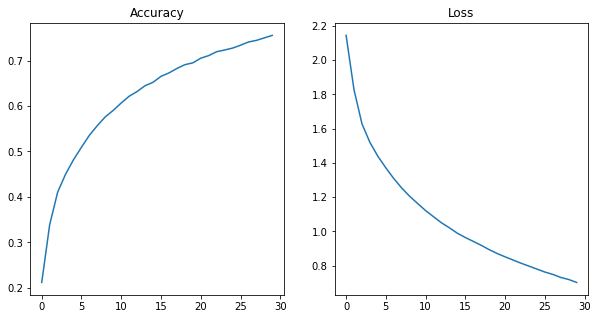

In [11]:
fig,ax=plt.subplots(1,2,figsize=(10,5))
ax[0].plot(model_history.history['accuracy'],label ='accuracy')
ax[0].set_title('Accuracy')
ax[1].plot(model_history.history['loss'],label ='loss')
ax[1].set_title('Loss')

plt.show()

In [12]:
test_loss,test_accuracy= model.evaluate(x_test,y_test)
print('Test Accuracy- ',test_accuracy)
print('Test loss- ',test_loss)

313/313 [==============================] - 4s 11ms/step - loss: 0.9159 - accuracy: 0.6928
Test Accuracy-  0.692799985408783
Test loss-  0.9159036874771118
